In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import pandas as pd
from scipy.optimize import minimize
import matplotlib.dates as mdates
from matplotlib.ticker import AutoMinorLocator

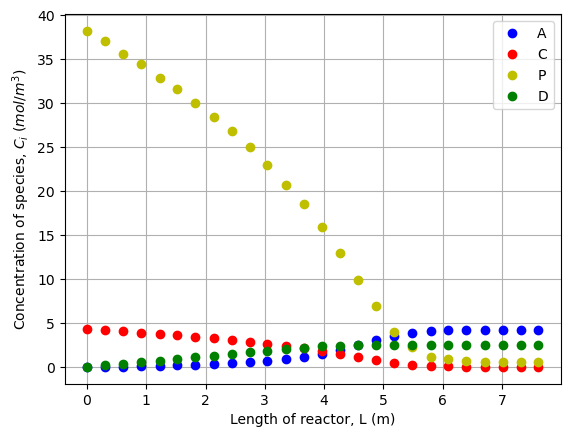

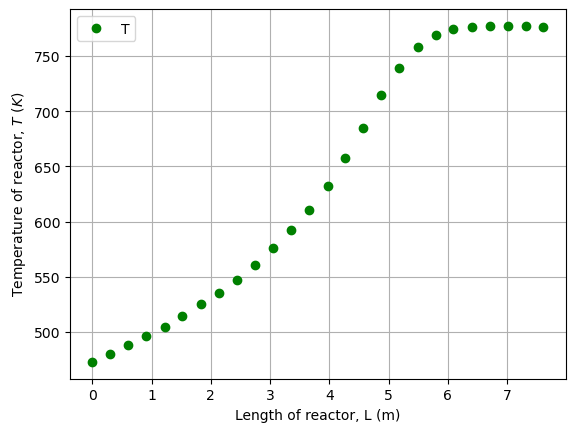

[472.76029056 480.02421308 487.89346247 496.36803874 504.84261501
 514.52784504 525.42372881 535.10895884 547.21549637 560.53268765
 575.66585956 592.00968523 610.16949153 632.56658596 657.38498789
 684.62469734 714.28571429 739.10411622 758.47457627 768.76513317
 774.21307506 776.02905569 777.23970944 777.23970944 777.23970944
 776.63438257]


In [2]:
data = pd.read_excel (r'/Users/advayshirwalkar/Desktop/MathPfile.xlsx')
Ld = np.array(data['L'])
Td = np.array(data['T'])
CPd = np.array(data['P'])
CCd = np.array(data['C'])
CAd = np.array(data['A'])
CDd = np.array(data['D'])
CHd = np.array(data['H'])


training_data= CPd, CCd, CAd, CDd, CHd, Td

plt.plot(Ld,CAd,'bo', label = "A")
plt.plot(Ld,CCd,'ro', label = "C")
plt.plot(Ld,CPd,'yo', label = "P")
plt.plot(Ld,CDd,'go', label = "D")
# plt.plot(Ld,CHd,'ko', label = "H")
plt.xlabel("Length of reactor, L (m)")
plt.ylabel("Concentration of species, $C_i$ ($mol/m^3$)");
plt.legend()
plt.grid()
plt.show()

plt.plot(Ld,Td,'go', label = "T")
plt.xlabel("Length of reactor, L (m)")
plt.ylabel("Temperature of reactor, $T$ ($K$)");
plt.legend()
plt.grid()
plt.show()
print(Td)

In [3]:
Pt = 2.02e5 #Reactor Pressure (Pa)
di = 0.05 #Diameter of reactor (m)
L = 8 #Length of reactor (m)
M = 4 #Ratio of Propyne to chlorine
Fp0 = 385/3600 #Molar flowrate of propyne (mol/sec)
Fc0 = Fp0/M #Molar flowrate of chlorine (mol/sec)
Fa0 = 0 #Molar flowrate of allyl chloride (mol/sec)
Fd0 = 0 #Molar flowrate of dichloropropane (mol/sec)
Fh0 = 0 #Molar flowrate of hydrogen chloride (mol/sec)
A = np.pi*di**2/4 #Inner cross-sectional area of pipe
R = 8.314472 #Universal Gas Constant (J/mol.K)
T0 = 472.76
P = Pt

delH1 = -113085.2   #Heat of reaction 1 at 298K (J/mol)
delH2 = -185893.9   #Heat of reaction 2 at 298K (J/mol)
Cpp = 60.03 #Specific Heat Capacity of Propyne(P) (J/mol.K)
Cpc = 33.6 #Specific Heat Capacity of Chlorine(C) (J/mol.K)
Cpa = 90.2 #Specific Heat Capacity of Allyl chloride(A) (J/mol.K)
Cpd = 110.3 #Specific Heat Capacity of Dichloropropane(D) (J/mol.K)
Cph = 35.34 #Specific Heat Capacity of Hydrgen Chloride(H) (J/mol.K)
Cpt = (2*Cpp+2*Cpc+Cpa+Cpd+Cph)/7 #Change it later
Ta = 300 #Coolant temperature
Al = (np.pi*di*L) #Area of surface (m2)
# U = 250 #Heat transfer coefficient for cooling (W/m2.K)

# Data Fitting

0.051389686743229954
0.13368055555555555
2.6013109638806378



/var/folders/ss/kknzm06967v_gyy7tc4c0t6m0000gn/T/ipykernel_10974/1755094930.py:69: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(L_steps, training_data[:,0]/v, color = 'm')
/var/folders/ss/kknzm06967v_gyy7tc4c0t6m0000gn/T/ipykernel_10974/1755094930.py:70: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(L_steps, training_data[:,1]/v, color = 'g')
/var/folders/ss/kknzm06967v_gyy7tc4c0t6m0000gn/T/ipykernel_10974/1755094930.py:71: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(L_steps, training_data[:,2]/v, color = 'r')
/var/folders/ss/kknzm06967v_gyy7tc4c0t6m0000gn/T/ipykernel_10974/1755094930.py:72: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(L_steps, training_data[:,3]/v, color = 'b')
/var/folders/ss/kknzm06967v_gyy7tc4c0t6m0000gn/T/ipykernel_10974/1755094930.py:73: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(L_steps, training_data[:,4]/v, color = 'k')


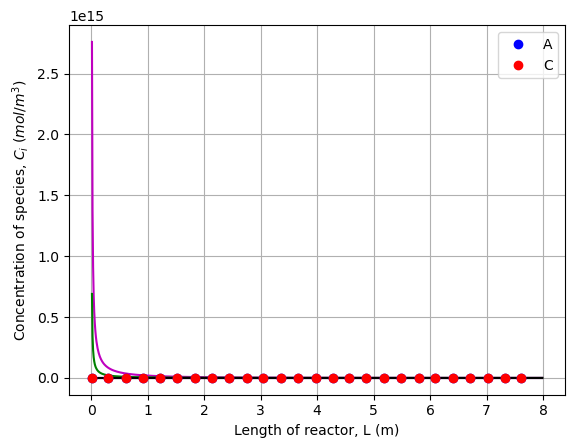

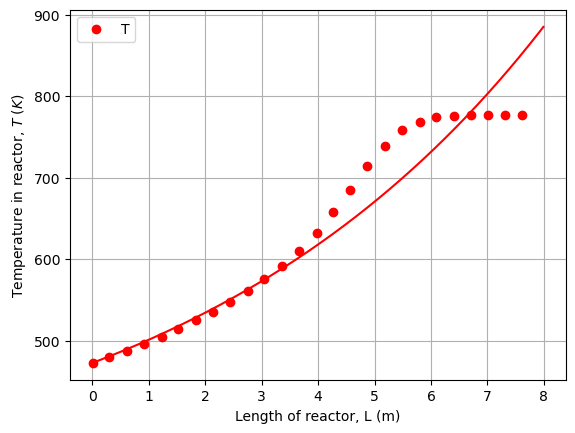

0.0

In [17]:
CT0 = Pt / R / T0 / 1000
Ft0 = Fp0 + Fc0 + Fa0 + Fd0 + Fh0
v0 = Ft0/CT0  

print(CT0)
print(Ft0)
print(v0)
print()
def odes(x,t,k10, k20, Ea1, Ea2,U): 

#     Fp = x[0]
#     Fc = x[1]
#     Fa = x[2]
#     Fd = x[3]
#     Fh = x[4]
#     T = x[5]


    Fp,Fc,Fa,Fd,Fh,T = x 
    
    Ft = Fp+Fc+Fa+Fd+Fh
    v = v0*(Ft/Ft0)
        
    Cp=(Fp/v0)    
    Cc=(Fc/v0)
    Ca=(Fa/v0)   
    Cd=(Fd/v0)
    Ch=(Fh/v0)
    
    r1 = k10*np.exp(-Ea1/(R*T))*Cp*Cc
    r2 = k20*np.exp(-Ea2/(R*T))*Cp*Cc
    
    rp = -r1-r2
    rc = -r1-r2
    ra = r1
    rd = r2
    rh = r1
    
    dFpdL = A*(rp)
    dFcdL = A*(rc)
    dFadL = A*(ra)
    dFddL = A*(rd)
    dFhdL = A*(rh)
    dTdL = A*(-(delH1*r1 + delH2*r2) + U*Al*(T-Ta))/(Ft*Cpt)
    
    f = [ dFpdL, dFcdL, dFadL, dFddL, dFhdL, dTdL ]
    
    return f 

L_steps = np.arange(0,8,0.01)  #time scale

ic = [Fp0, Fc0, Fa0, Fd0, Fh0, T0]  #initial values of N(t) and c(t)

guess = (8e-5,4e-9, 50000, 15000, 500)   #guess values of parameters

training_data = odeint(odes, ic, L_steps,args= guess)

FP = training_data[:,0]
FC = training_data[:,1]
FA = training_data[:,2]
FD = training_data[:,3]
FH = training_data[:,4]
T = training_data[:,5]

FT = FP+FC+FA+FD+FH

v = v0 * FH / Ft0

plt.plot(L_steps, training_data[:,0]/v, color = 'm')
plt.plot(L_steps, training_data[:,1]/v, color = 'g')
plt.plot(L_steps, training_data[:,2]/v, color = 'r')
plt.plot(L_steps, training_data[:,3]/v, color = 'b')
plt.plot(L_steps, training_data[:,4]/v, color = 'k')
plt.plot(Ld,CAd,'bo', label = "A")
plt.plot(Ld,CCd,'ro', label = "C")
plt.xlabel("Length of reactor, L (m)")
plt.ylabel("Concentration of species, $C_i$ ($mol/m^3$)");
plt.legend()
plt.grid()
plt.show()

plt.plot(L_steps, training_data[:,5], color = 'r')
plt.plot(Ld,Td,'ro', label = "T")
plt.xlabel("Length of reactor, L (m)")
plt.ylabel("Temperature in reactor, $T$ ($K$)");
plt.legend()
plt.grid()
plt.show()

def RMSE(params):
    k10, k20, Ea1, Ea2, U = params;
    ODE_output = odeint(odes, ic, L_steps, args = (k10, k20, Ea1, Ea2, U));
    err = training_data - ODE_output
    return np.sqrt(np.sum(err**2))  # we return the summed squared error directly

RMSE(guess)


In [14]:
FA

array([0.00000000e+00, 1.98177751e-18, 3.95793748e-18, 5.92849613e-18,
       7.89347207e-18, 9.85287458e-18, 1.18067221e-17, 1.37550321e-17,
       1.56978220e-17, 1.76351094e-17, 1.95669118e-17, 2.14932466e-17,
       2.34141314e-17, 2.53295836e-17, 2.72396208e-17, 2.91442604e-17,
       3.10435198e-17, 3.29374111e-17, 3.48259473e-17, 3.67091445e-17,
       3.85870189e-17, 4.04595864e-17, 4.23268634e-17, 4.41888657e-17,
       4.60456097e-17, 4.78971113e-17, 4.97433867e-17, 5.15844520e-17,
       5.34203233e-17, 5.52510151e-17, 5.70765409e-17, 5.88969163e-17,
       6.07121568e-17, 6.25222778e-17, 6.43272948e-17, 6.61272235e-17,
       6.79220793e-17, 6.97118777e-17, 7.14966342e-17, 7.32763644e-17,
       7.50510837e-17, 7.68207725e-17, 7.85855224e-17, 8.03453009e-17,
       8.21001235e-17, 8.38500053e-17, 8.55949619e-17, 8.73350084e-17,
       8.90701601e-17, 9.08004321e-17, 9.25258395e-17, 9.42463976e-17,
       9.59621212e-17, 9.76730244e-17, 9.93791173e-17, 1.01080414e-16,
      

In [6]:
sol = minimize(RMSE, x0 = guess);
print(sol);

      fun: 0.0
 hess_inv: array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])
      jac: array([6.24875009e-03, 1.38208977e-01, 4.96947340e-18, 7.83457546e-18,
       4.83814030e+00])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 168
      nit: 0
     njev: 26
   status: 2
  success: False
        x: array([8.e-05, 4.e-09, 5.e+04, 1.e+04, 2.e+02])


# Parametric sensitivity

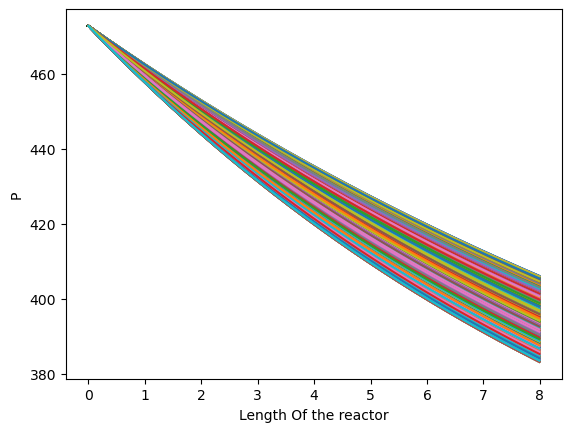

In [7]:
# generate several output for random selections of parameters
N = 1000;
k10 = np.random.uniform(8e-5*.8,8e-5*1.2,N);
k20 = np.random.uniform(5e-9*0.8,5e-9*1.2,N);
Ea1 = np.random.uniform(50000*0.8,50000*1.2,N);
Ea2 = np.random.uniform(10000*0.8,10000*1.2,N);
U = np.random.uniform(250*0.8,1.2*250,N);

P = np.zeros(N);

for m in np.arange(0,N,1):
    output = odeint(odes, ic, L_steps, args = (k10[m], k20[m], Ea1[m], Ea2[m], U[m]));
    plt.plot(L_steps,output[:,5]);
    plt.xlabel("Length Of the reactor");
    plt.ylabel("P");
    P[m]=output[-1][5];

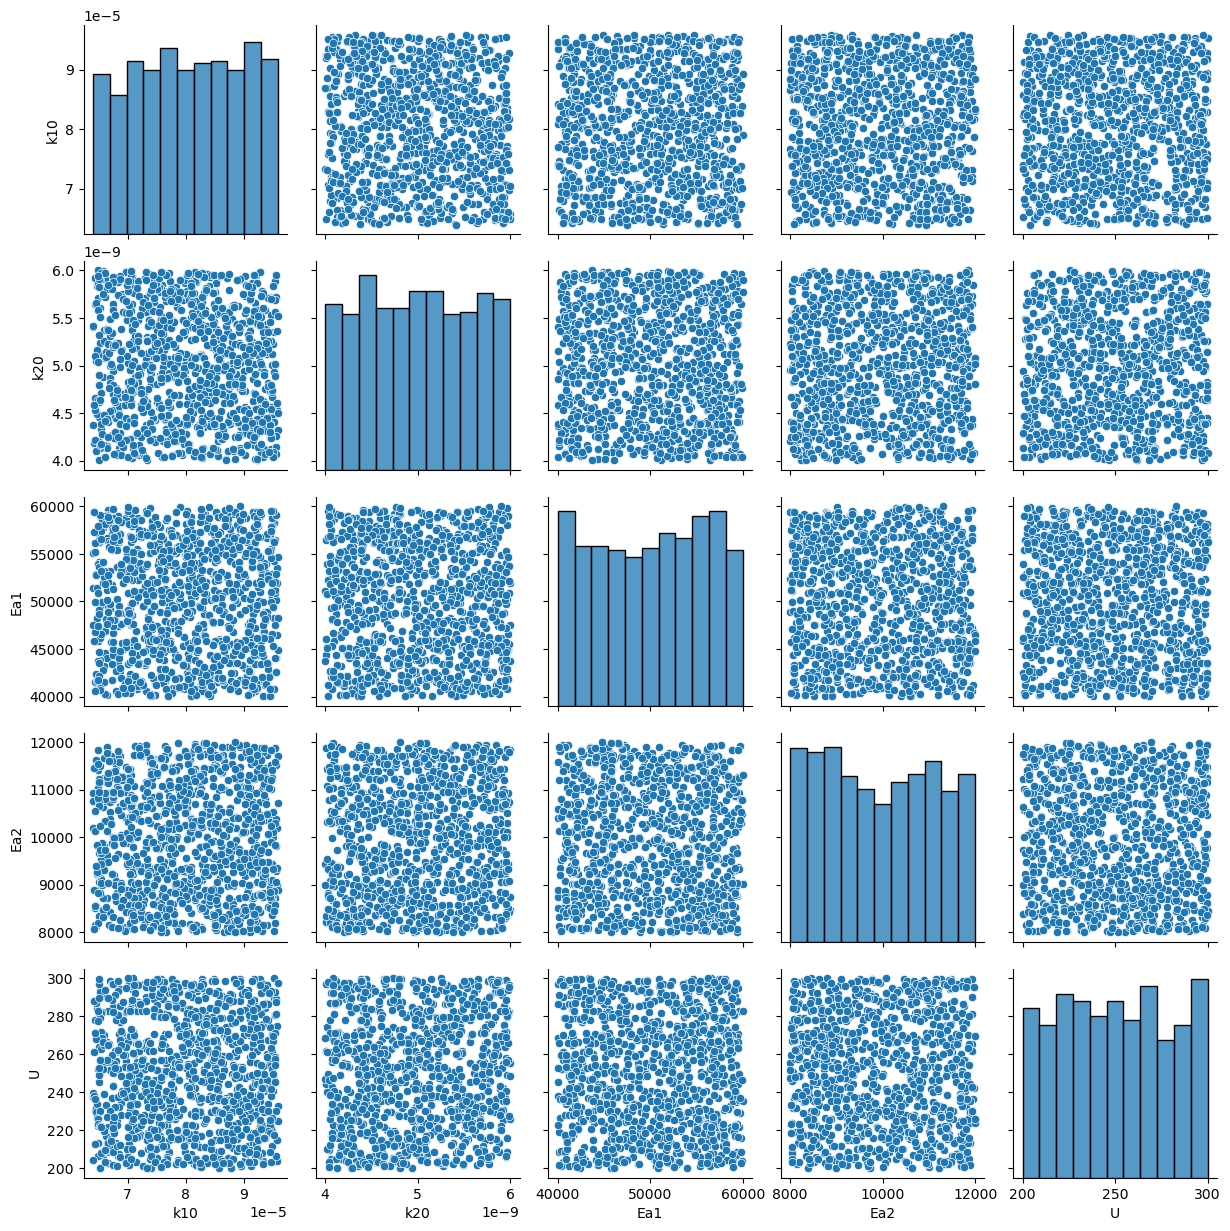

In [8]:
# Plot histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'k10':k10, 'k20':k20, 'Ea1':Ea1, 'Ea2':Ea2, 'U':U};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)  
20
plt.show()

Our fitted equn is y =  0.005445504321142228 k10 +  -0.03084217076861724 k20 + 0.1797282639640704 Ea1 0.46803375130173724 Ea2 0.635288305690914 U


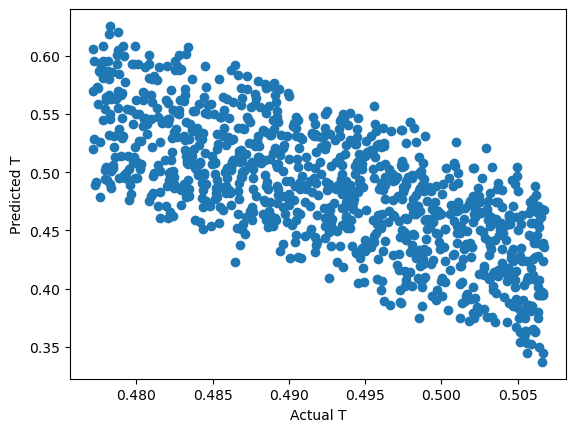

In [9]:
y = (776.6-P)/776.6; # See first set of code to find this number


# Build our X. Normalize values
X = np.c_[(8e-5-k10)/8e-5,(5e-9-k20)/5e-9,(62300-Ea1)/62300, (15500-Ea2)/15500, (450-U)/450]

# Now can just do the linear least squares estimate
#===================================================

from numpy.linalg import inv
tmp = inv(np.matmul(np.transpose(X),X));

params = tmp @ np.transpose(X) @ y;
print("Our fitted equn is y = ",params[0], "k10 + ", params[1], "k20 +", params[2],"Ea1", params[3],"Ea2", params[4],"U")

plt.plot(y,X @ params,"o");
plt.ylabel("Predicted T");
plt.xlabel("Actual T");

# Bifercation Analysis

In [10]:
def func(x,k10, k20, Ea1, Ea2, r): 

#     Fp = x[0]
#     Fc = x[1]
#     Fa = x[2]
#     Fd = x[3]
#     Fh = x[4]
#     T = x[5]

    Fp,Fc,Fa,Fd,Fh,T = x 
    
    
    Ft0 = Fp0 + Fc0 + Fa0 + Fd0 + Fh0
    CT0 = Pt / R / T / 1000
    v0 = Ft0/CT0  

    Ft = Fp+Fc+Fa+Fd+Fh
    v = v0*(Ft/Ft0)
        
    Cp=CT0*(Fp/Ft0)    
    Cc=CT0*(Fc/Ft0)
    Ca=CT0*(Fa/Ft0)   
    Cd=CT0*(Fd/Ft0)
    Ch=CT0*(Fh/Ft0)
    
    r1 = k10*np.exp(-Ea1/(R*T))*Cp*Cc
    r2 = k20*np.exp(-Ea2/(R*T))*Cp*Cc
    
    dFpdL = A*(-r1-r2)
    dFcdL = A*(-r1-r2)
    dFadL = A*(r1)
    dFddL = A*(r2)
    dFhdL = A*(r1)
    dTdL = A*(-(delH1*r1 + delH2*r2) + U*Al*(T-Ta))/(Ft*Cpt)
    
    f = [ dFpdL, dFcdL, dFadL, dFddL, dFhdL, dTdL ]
    
    return f 

# list r values to test
r = [0.6*450, 1.5*450, 5*450] # Be sure to try -.1 to .1
print(r)


Fp_values = np.linspace(0,0,100)
Fc_values = np.linspace(0,0,100)
Fa_values = np.linspace(20,20,100)
Fd_values = np.linspace(5,5,100)
Fh_values = np.linspace(20,20,100)
T_values = np.linspace(450, 750,100)


for n in r:
    plt.plot(T_values, func(Fp_values,Fc_values,Fa_values,Fd_values,Fh_values,T_values),arg = (k10,k20,Ea1,Ea2,r))

plt.legend(labels = r)

[270.0, 675.0, 2250]


ValueError: too many values to unpack (expected 6)

In [ ]:
# Fa0 = 0.0376      # mol/s
# Ca0 = 0.0188      # mol / L

# v0 = Fa0 / Ca0    # initial volumetric flow
# Ft0 = Fa0

# T0 = 1035.0       # K

# # thermal properties
# Hrxn_298 = 80.77   # kJ/mol at 298K
# Cpa = 0.1630       # kJ/mol/K
# Cpb = 0.083
# Cpc = 0.071

# def adiabatic_pfr(Y, V):
#     Fa, T = Y  # unpack variables

#     extent = (Fa - Fa0) / (-1.0)
#     Fb = extent
#     Fc = extent

#     Ft = Fa + Fb + Fc

#     # include temperature in the volumetric flow
#     v = v0 * Ft / Ft0 * T / T0

#     # reaction rate
#     k = np.exp(34.3 - 34222.0 / T)
#     Ca = Fa / v
#     r = k * Ca
#     ra = -r

#     # thermodynamic reaction energy
#     Hrxn = Hrxn_298 + (Cpb + Cpc - Cpa) * (T - 298.0)

#     dFadV = ra
#     dTdV = (-Hrxn * r) / (Fa * Cpa + Fb * Cpb + Fc * Cpc)

#     return [dFadV, dTdV]


# Vspan = np.linspace(0, 15) # volume in L
# Y0 = [Fa0, T0]

# sol = odeint(adiabatic_pfr, Y0, Vspan)

# Fa = sol[:, 0]
# T = sol[:, 1]

# X = ((Fa - Fa0) * (-1) / Fa0)

# plt.subplot(1, 2, 1)
# plt.plot(Vspan, X)
# plt.xlabel('Volume (L)')
# plt.ylabel('Conversion')

# plt.subplot(1, 2, 2)
# plt.plot(Vspan, T)
# plt.xlabel('Volume (L)')
# plt.ylabel('Temperature (K)')

# plt.tight_layout()
# # plt.savefig('images/adiabatic-pfr-1.png')

In [ ]:
dummyv = np.linspace(0, 8, 100)
dummyi = np.ones_like(dummyv)
dummym = np.ones_like(dummyv)

fig, axs = plt.subplots(1, 2, figsize=(20, 8))

axs[0].plot(
    dummyv,
    model(0, np.array([dummyv, dummyi, dummym]), paramstot)[0],
    label=rf"r_I,V ={paramstot[2]}",
)
for i in np.array([0.001, 0.01, 1, 2, 3, 10, 20, 30, 100, 200]):
    copy[2] = paramstot[2] * i
    axs[1].plot(
        dummyv,
        model(0, np.array([dummyv, dummyi, dummym]), copy)[0],
        label=rf"r-I,V={i*paramstot[2]:1.2e}",
    )

for i in axs:
    i.set_xlabel("V")
    i.set_ylabel("dVdt")
fig.tight_layout()
plt.legend()